This the note book version of the initial script. 

In [11]:
%matplotlib inline

import csv,os
import numpy as np
from matplotlib import pyplot as plt

def load_data(filename):
    """ read the csv file and do necessary type conversion
    Args:
        filename(str): the data file name, give either an absolute path or a path 
        relative to the current directory 
    Returns:
        A list of OrderedDict containing the data in the data file
        A typicl example would looke like:
        [{'year': 1970, 'Australia': 100,'United Kindom':100, 'United States': 100},
        {'year': 1971, 'Australia': 110,'United Kindom':115, 'United States': 120}]
    """
    data=[]
    with open(filename, 'r') as csvfile:
        dict_reader = csv.DictReader(csvfile,delimiter=',')
        for dict_row in dict_reader:
            data.append(dict_row)

    #do type converstion
    columns = list(data[0].keys())
    columns.remove('year')

    for row in data:
        row['year']=int(row['year'])
        for key in columns:
            item = row[key]
            if len(item) == 0:
                row[key] = None
            else:
                row[key] = float(item)
    # sort by year
    data = sorted(data, key=lambda k: k['year'])
    return data
    

def plot_original(data, countries, cm = 'jet'):
    """ Produce a line plot of the original data 
    Args:
        data(list): A list representing many time series data of the format
            [{'year': 1970, 'Australia': 100,'United Kindom':100, 'United States': 100},
             {'year': 1971, 'Australia': 110,'United Kindom':115, 'United States': 120}]
            The data might not be sorted
        countries(list): a list contains the contries we want to plot example would be ['Australia', 'United States'] 
    """
    
    series_list = []
        
    for country in countries:
        series_dict={}
        series_dict['name'] = country
        series_dict['values'] = [row[country] for row in data]
        series_list.append(series_dict)
        
    year = [row['year'] for row in data]
    lines = len(countries)
    color_idx = np.linspace(0, 1, lines)
    # matplotlib color map reference
    # http://matplotlib.org/tutorials/colors/colormaps.html 
    for row, color in zip(series_list, color_idx):
        plt.plot(year, row['values'], color=plt.get_cmap(cm)(color), lw=2)
    plt.legend(countries)
    plt.title("CO2 Emission in " + ','.join(countries))
        
def plot_annual_growth(data,countries,cm ='jet'):
    """ Produce a line plot of the annual growth data computed using the original one 
    Args:
        data: A list representing many time series data of the format
            [{'year': 1970, 'Australia': 100,'United Kindom':100, 'United States': 100},
             {'year': 1971, 'Australia': 110,'United Kindom':115, 'United States': 120}]
            The data might not be sorted
        countries: a list contains the contries we want to plot example would be ['Australia', 'United States']
    """
    series_list = []
        
    for country in countries:
        series_dict={}
        series_dict['name'] = country
        raw_data = [row[country] for row in data]
        series_dict['values'] = [100.0 * d2 / d1 - 100 for d1, d2 in zip(raw_data,raw_data[1:])]
        series_list.append(series_dict)
        
    year = [row['year'] for row in data]
    lines = len(countries)
    color_idx = np.linspace(0, 1, lines)
    # matplotlib color map reference
    # http://matplotlib.org/tutorials/colors/colormaps.html 
    for row, color in zip(series_list, color_idx):
        plt.plot(year[1:], row['values'], color=plt.get_cmap(cm)(color), lw=2)
    plt.legend(countries)
    plt.title("CO2 Emission Annual Growth in " + ','.join(countries))

def plot_percentage(data,countries,total_column='World',cm='jet'):
    series_list = []

    total = [row[total_column] for row in data]    
    year = [row['year'] for row in data]
    
    for country in countries:
        series_dict={}
        series_dict['name'] = country
        raw_data = [row[country] for row in data]
        series_dict['values'] = [r/t * 100 for r, t 
                                  in zip(raw_data,total)]
        
        series_list.append(series_dict)
    lines = len(countries)
    color_idx = np.linspace(0, 1, lines)
    ylim=[0,100]
    legends = [row['name'] for row in series_list]
    fig, ax = plt.subplots()
    plt.ylim(ylim)
    for i in range(0,lines):
        ax.fill_between(year, ylim[0], series_list[i]['values'], color=plt.get_cmap(cm)(color_idx[i]), alpha = 0.5)
    plt.legend(countries)       


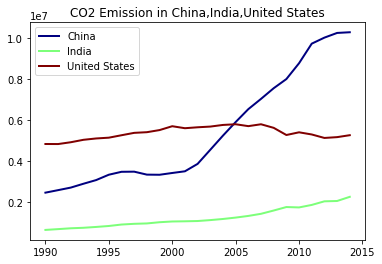

In [12]:
data_path = 'data'
data_file_name = 'co2_emission.csv'
file = os.path.join(data_path,data_file_name)
data = load_data(file)

countries = ['China','India','United States']
plot_original(data,countries)

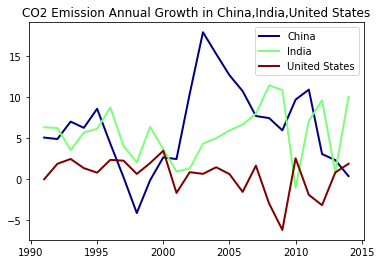

In [13]:
plot_annual_growth(data, countries)

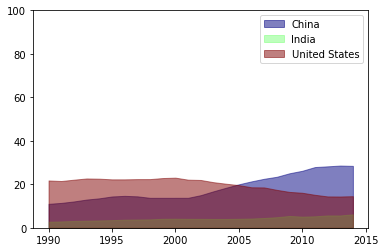

In [14]:
plot_percentage(data,countries)